# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [27]:
import numpy as np
import pandas as pd
import matplotlib as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [47]:

df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [17]:

num_rows = len(df)

df.dropna(subset=['STATE_REVENUE'])

display(df)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 8 Math

How many years of data are logged in our dataset? 

27 years


In [18]:
# @@@ 1
# Your Code

years = 2019 - 1992
print(years)

27


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [19]:
# @@@ 2

michigan_subset = df[df["STATE"] == "MICHIGAN"]
ohio_subset = df[df["STATE"] == "OHIO"]
mich_avg = michigan_subset["AVG_MATH_8_SCORE"].mean()
ohio_avg = ohio_subset["AVG_MATH_8_SCORE"].mean()

print("Michigan average: " + str(mich_avg))
print("Ohio average: " + str(ohio_avg))




Michigan average: 276.1666666666667
Ohio average: 282.25


Find the average for your chosen test across all states in 2019

In [20]:
# @@@ 3

all_states_avg = df["AVG_MATH_8_SCORE"].mean()
print(all_states_avg)



278.28073089700996


For each state, find a maximum value for your chosen test score

In [21]:
# @@@ 4

for i in df["STATE"]:
    state_subset = df[df["STATE"] == i]
    print(i + ": " + str(state_subset["AVG_MATH_8_SCORE"].max()))

ALABAMA: 269.0
ALASKA: 283.0
ARIZONA: 283.0
ARKANSAS: 279.0
CALIFORNIA: 277.0
COLORADO: 292.0
CONNECTICUT: 289.0
DELAWARE: 284.0
DISTRICT_OF_COLUMBIA: 269.0
FLORIDA: 281.0
GEORGIA: 281.0
HAWAII: 281.0
IDAHO: 287.0
ILLINOIS: 285.0
INDIANA: 288.0
IOWA: 286.0
KANSAS: 290.0
KENTUCKY: 282.0
LOUISIANA: 273.0
MAINE: 289.0
MARYLAND: 288.0
MASSACHUSETTS: 301.0
MICHIGAN: 280.0
MINNESOTA: 295.0
MISSISSIPPI: 274.0
MISSOURI: 286.0
MONTANA: 293.0
NEBRASKA: 288.0
NEVADA: 278.0
NEW_HAMPSHIRE: 296.0
NEW_JERSEY: 296.0
NEW_MEXICO: 274.0
NEW_YORK: 283.0
NORTH_CAROLINA: 286.0
NORTH_DAKOTA: 293.0
OHIO: 290.0
OKLAHOMA: 279.0
OREGON: 285.0
PENNSYLVANIA: 290.0
RHODE_ISLAND: 284.0
SOUTH_CAROLINA: 282.0
SOUTH_DAKOTA: 291.0
TENNESSEE: 280.0
TEXAS: 290.0
UTAH: 287.0
VERMONT: 295.0
VIRGINIA: 290.0
WASHINGTON: 290.0
WEST_VIRGINIA: 274.0
WISCONSIN: 289.0
WYOMING: 289.0
ALABAMA: 269.0
ALASKA: 283.0
ARIZONA: 283.0
ARKANSAS: 279.0
CALIFORNIA: 277.0
COLORADO: 292.0
CONNECTICUT: 289.0
DELAWARE: 284.0
DISTRICT_OF_COLUMBIA:

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [48]:
# @@@ 5

# First one is expenditure_per_student

state = ""
state_subset = df[df["STATE"] == state]
expenditure = state_subset["TOTAL_EXPENDITURE"]
students = state_subset["GRADES_ALL_G"]
expenditures = []
for i in df["STATE"]:
    state_subset = df[df["STATE"] == i]
    expenditure = state_subset["TOTAL_EXPENDITURE"]
    students = state_subset["GRADES_ALL_G"]
    expenditure_per_student = expenditure / students
    expenditures.append(expenditure_per_student)

df["EXPENDITURE_PER_STUDENT"] = expenditures

# Second one is the amount of state revenue that the school receives

revenue_received_per_student = []
for i in df["STATE"]:
    subset = df[df["STATE"] == i]
    revenue = subset["STATE_REVENUE"]
    students = subset["GRADES_ALL_G"]
    per_student = revenue / students
    revenue_received_per_student.append(per_student)

df["STATE_REVENUE_PER_STUDENT"] = revenue_received_per_student


display(df)


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,STATE_REVENUE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0 3.627221 51 3.858749 102 4...,0 2.267565 51 2.355064 102 2.51...
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1 7.939520 52 8.943358 103 8...,1 5.883980 52 6.159915 103 5...
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2 5.050774 53 5.108085 104 5.15...,2 2.033945 53 1.995068 104 2.00...
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3 3.948044 54 3.097359 105 3...,3 2.171703 54 1.735605 105 1.81...
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4 5.164536 55 5.276848 106 4...,4 3.148812 55 3.203192 106 2.43...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,46 5.566750 97 5.696316 148 5...,46 2.112686 97 2.256123 148 2.26...
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,47 5.979904 98 6.322860 149 6...,47 3.868238 98 4.061592 149 4.23...
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,48 4.988966 99 5.820442 150 5...,48 3.210229 99 3.881454 150 3.81...
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,49 6.247139 100 6.683307 151 6...,49 2.659030 100 2.613319 151 2.74...


Feature engineering justification: I chose to analyze the total expenditure per student because I'm hypothesizing that the more money a school is able to spend per student, the students will have access to more resources and thus perform better on standardized tests. I chose to analyze the revenue received because I am hypothesizing that schools who receive more state funding may have students who perform worse on standardized tests because they are public schools and may come from lower income areas. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,STATE_REVENUE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0 3.627221 51 3.858749 102 4...,0 2.267565 51 2.355064 102 2.51...
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1 7.939520 52 8.943358 103 8...,1 5.883980 52 6.159915 103 5...
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2 5.050774 53 5.108085 104 5.15...,2 2.033945 53 1.995068 104 2.00...
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3 3.948044 54 3.097359 105 3...,3 2.171703 54 1.735605 105 1.81...
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4 5.164536 55 5.276848 106 4...,4 3.148812 55 3.203192 106 2.43...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,46 5.566750 97 5.696316 148 5...,46 2.112686 97 2.256123 148 2.26...
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,47 5.979904 98 6.322860 149 6...,47 3.868238 98 4.061592 149 4.23...
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,48 4.988966 99 5.820442 150 5...,48 3.210229 99 3.881454 150 3.81...
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,49 6.247139 100 6.683307 151 6...,49 2.659030 100 2.613319 151 2.74...


KeyError: 'AVG_MATH_8_SCORE'

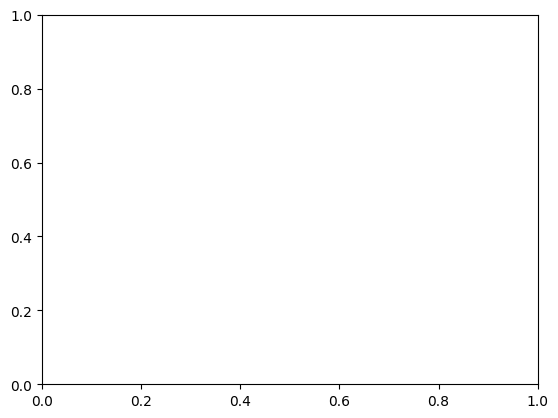

In [49]:
# @@@ 6
# print(df.columns)
display(df)
df['STATE_REVENUE_PER_STUDENT'] = pd.to_numeric(df['STATE_REVENUE_PER_STUDENT'], errors='coerce')
df['AVG_MATH_8_SCORE'] = pd.to_numeric(df['AVG_MATH_8_SCORE'], errors='coerce').notna()
# df = df.dropna(subset=['STATE_REVENUE_PER_STUDENT', 'AVG_MATH_8_SCORE'])
df.plot.scatter(x='STATE_REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', xlim=(0, 1000), ylim=(0, 500))




display(df)


This visualization is supposed to show the relationship or lack of a relationship between state revenue given per student and average math 8 score.

**Visualization 2**

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EXPENDITURE_PER_STUDENT,STATE_REVENUE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN,NaN


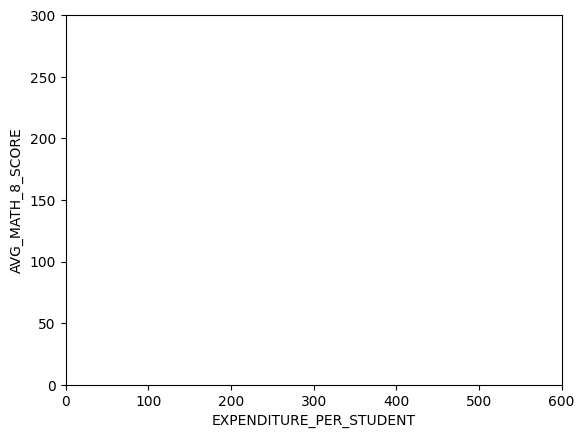

In [43]:
# @@@ 7
df['EXPENDITURE_PER_STUDENT'] = pd.to_numeric(df['EXPENDITURE_PER_STUDENT'], errors='coerce')
df.plot.scatter(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', xlim=(0,600), ylim=(0,300))
display(df)

This visualization is supposed to show the relationship or lack of a relationship between state total expenditure per student and average math 8 score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# @@@ 8

X = df[['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE', 'AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [53]:
# @@@ 9 
y.fillna(y.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [55]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression 


In [58]:
# @@@ 11
# create your model here
model = LinearRegression()

In [59]:
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [67]:
# @@@ 12
print(model.intercept_)
print(model.coef_)

model.score(X_test, y_test)
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

1.0
[0. 0. 0.]
0.0
0.0


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [68]:
# @@@ 13

col_name = plt.ylabel()


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

AttributeError: module 'matplotlib' has no attribute 'ylabel'

In [69]:
# @@@ 14


col_name = plt.ylabel()


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")

AttributeError: module 'matplotlib' has no attribute 'ylabel'

As a quick note at the end of this tutorial, I would like to add that I was having some weird errors that I could not figure out, despite lots of debugging/googling, so I when I am placed on a team, I will ask a team member to take a look if possible.